# Week 8 lab

## Set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ackley(x, a=20, b=0.2, c=2*np.pi):
    d = len(x)
    return -a * np.exp(-b * np.sqrt(np.sum(np.square(x))/d)) - \
        np.exp(np.sum(np.cos(c * x))/d) + a + np.exp(1)

## Test different approaches to generating the objective function surface

In [2]:
# Method 1: list comprehension (2D)
def method1(n):
    x = np.linspace(-30, 30, n)  # n points between -30 and 30
    y = np.linspace(-30, 30, n)  # n points between -30 and 30
    return (x, y, np.array([[ackley(np.array([i, j])) for i in x] for j in x]))  # 2D array using a list comprehension

%timeit method1(501)

3.75 s ± 75.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
# Method 2: pre-allocated array (2D)
def method2(n):
    x = np.linspace(-30, 30, n)  # n points between -30 and 30
    y = np.linspace(-30, 30, n)  # n points between -30 and 30
    z = np.zeros((n, n))  # pre-allocate the 2D array
    for i in range(n):
        for j in range(n):
            z[i, j] = ackley(np.array([x[i], y[j]]))
    return (x, y, z)

%timeit method2(501)

3.79 s ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Method 3: meshgrid with list comprehension (1D)
def method3(n):
    x = np.linspace(-30, 30, n)
    y = np.linspace(-30, 30, n)
    (xx, yy) = np.meshgrid(x, y)  # 2D arrays of x and y values separately
    xy = np.column_stack((xx.flatten(), yy.flatten()))  # 2D array of all combinations of x and y; first column is x and second column is y
    return (x, y, np.array([ackley(xyi) for xyi in xy]).reshape(xx.shape))

%timeit method3(501)

3.79 s ± 249 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Summary

There is no discernable difference between the different methods - use whichever comes most naturally!

## Plotting

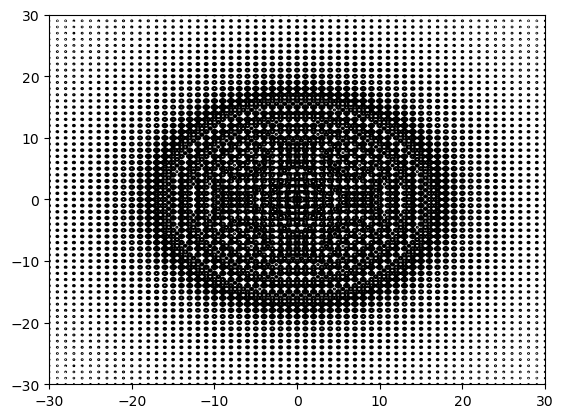

In [5]:
# plot contour lines
(x, y, z) = method1(1001)
plt.figure()
plt.contour(x, x, z, levels=np.linspace(0, 20, 21), colors='black')
plt.show()

## Julia

Corresponding Julia code (same as method 1 in Python) is given by

```julia
function method1(n)
    x = range(-30, 30, length=n)
    y = range(-30, 30, length=n)
    return [ackley([xi, yi]) for xi in x, yi in y]
end
```

which when timed gives

```julia
julia> using BenchmarkTools
julia> @btime method1(501)
  34.832 ms (753005 allocations: 59.36 MiB)
```

which is 108 times faster. A small modification to use statically-sized arrays gives a further speed up

```julia
using StaticArrays

function method2(n)
    x = range(-30, 30, length=n)
    y = range(-30, 30, length=n)
    return [ackley(@SVector[xi, yi]) for xi in x, yi in y]
end
```

which when timed gives

```julia
julia> @btime method2(501)
  8.870 ms (2 allocations: 1.92 MiB)
```

which is now 427 times faster than Python. Summary: Python is slow...